# Código - Trabajo Práctico 1 - Machine Learning


### Etapa 1: Scraping

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = []

headers = []

for i in range(1,11):
    url = f'https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_{i}.html'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')
        
        if i == 1:
            for header in table.find_all('th'):
                headers.append(header.text.strip())
            
        data.append(headers)
        
        for row in table.find_all('tr'):
            row_data = []
            for cell in row.find_all('td'):
                row_data.append(cell.text.strip())
            if row_data:
                data.append(row_data)
        
    

In [3]:
# Transformamos la lista resultante en un dataframe utilizando la lista "headers" para los nombres de las columnas.

df = pd.DataFrame(data, columns=headers)
print(df.shape)
df

(32187, 178)


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
1,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NA,NA,NA,8404.3203125,NA,NA,NA,NA,1620833.25,8404.3203125
3,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32182,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NA,NA,NA,3345.5556640625,NA,NA,NA,NA,1003666.6875,3345.5556640625
32183,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,5e+05,NA,NA,25958.333984375,NA,NA,NA,NA,6675000,25958.333984375
32184,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32185,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Etapa 2: Data cleaning

In [30]:
# Según las condiciones de la consigna, debemos quedarnos con:
# Individuos con una edad igual o superior a los 18 años.
# Evitar NAs que distorsionen los procedimientos.
# Individuos que tienen ingresos laborales mayores a cero.

# Transformamos a variable númerica la edad
df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(0).astype(int)


# Filtramos por edad
df_18 = df[df['age']>= 18]

# Reemplazamos con 0 aquellas que tienen NA
df_18 = df_18.replace("NA",0)

# Filtramos por ingreso positivo
df_18 = df_18[df_18['y_salary_m_hu'] != 0]

# Transformo el tipo de variable. Comenzamos por una selección de las mismas

variables = ['estrato1','sex','age', 'formal','fweight','maxEducLevel','y_salary_m_hu', 'y_ingLab_m',
            'p6585s1', 'p6585s2', 'p6585s3', 'p6585s4']

for v in variables:
    df_18[v] = df_18[v].astype(float)

In [31]:
# El dataset resultante queda de la siguiente manera
print(f"El dataset cuenta con un total de {df_18.shape[0]} observaciones")

df_18

El dataset cuenta con un total de 9892 observaciones


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
2,2,4514331,1,1,1,BOGOTA,1,2.00,1.00,36.00,...,0,0,0,8404.3203125,0,0,0,0,1620833.25,8404.3203125
9,9,4514333,1,1,1,BOGOTA,1,2.00,1.00,51.00,...,0,0,0,6703.3427734375,0,0,0,0,1378973.375,6703.3427734375
14,14,4514334,1,1,1,BOGOTA,1,2.00,1.00,45.00,...,0,0,0,3680.65405273438,0,0,0,0,883357,3680.65405273438
16,16,4514335,1,1,1,BOGOTA,1,2.00,1.00,61.00,...,0,0,0,4083.33325195312,0,0,0,0,7e+05,4083.33325195312
22,22,4514338,1,2,1,BOGOTA,1,2.00,0.00,35.00,...,0,0,0,9437.84765625,0,0,0,0,1941500.125,9437.84765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32174,3205,4804453,1,6,1,BOGOTA,12,3.00,1.00,24.00,...,0,0,0,5288.888671875,0,0,0,0,1088000,5288.888671875
32176,3207,4804453,1,8,1,BOGOTA,12,3.00,0.00,50.00,...,0,0,0,4864.12744140625,0,0,0,0,1146544.375,4864.12744140625
32181,3212,4804454,1,1,1,BOGOTA,12,2.00,1.00,27.00,...,0,0,0,4453.359375,0,0,0,0,916119.6875,4453.359375
32182,3213,4804454,1,2,1,BOGOTA,12,2.00,0.00,24.00,...,0,0,0,3345.5556640625,0,0,0,0,1003666.6875,3345.5556640625


In [32]:
# Realizamos una selección de variables

df_18 = df_18[['directorio', 'secuencia_p', 'orden', 'formal','estrato1', 'sex', 'age','fweight', 'maxEducLevel',
              'y_salary_m_hu','y_total_m', 'p6585s1', 'p6585s2', 'p6585s3', 'p6585s4']]

# Transformamos las variables subsidios en dicotómicas. Primero, quitamos los que respondieron no saber:

subsidios = ['p6585s1', 'p6585s2', 'p6585s3', 'p6585s4']
for s in subsidios:
    df_18 = df_18[df_18[s] != 9.0]

# Ahora reemplazamos los que responden que no por 0 y los que sí por 1:

for s in subsidios:
    df_18[s] = df_18[s].apply(lambda x: 1 if x == 1 else 0)

df_18


# Filtramos por aquellos que no respondieron su nivel educativo

df_18 = df_18[df_18['maxEducLevel'] != 0.0]
df_18

,directorio,secuencia_p,orden,formal,estrato1,sex,age,fweight,maxEducLevel,y_salary_m_hu,y_total_m,p6585s1,p6585s2,p6585s3,p6585s4
2,4514331,1,1,1.00,2.00,1.00,36.00,255.00,6.00,6740.74,1620833.25,1,0,1,0
9,4514333,1,1,1.00,2.00,1.00,51.00,194.00,7.00,5833.33,1378973.375,0,1,0,0
14,4514334,1,1,1.00,2.00,1.00,45.00,243.00,4.00,3073.82,883357,0,1,0,0
16,4514335,1,1,0.00,2.00,1.00,61.00,230.00,3.00,4083.33,7e+05,0,0,0,0
22,4514338,1,2,1.00,2.00,0.00,35.00,342.00,7.00,8263.89,1941500.125,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32174,4804453,1,6,1.00,3.00,1.00,24.00,233.00,7.00,5045.83,1088000,0,1,0,0
32176,4804453,1,8,1.00,3.00,0.00,50.00,233.00,6.00,4310.30,1146544.375,0,1,0,0
32181,4804454,1,1,1.00,2.00,1.00,27.00,387.00,6.00,3797.70,916119.6875,0,1,1,0
32182,4804454,1,2,1.00,2.00,0.00,24.00,387.00,6.00,3000.00,1003666.6875,0,0,1,0


### Etapa 3: Análisis descriptivo

In [33]:
# La función summarize busca replicar el comando del mismo nombre que se utiliza en STATA.

def summarize(df, x, ponder):
    """
    Función que devuelve una tabla de estadísticas principales con ponderadores
    
    """
    mean_w = np.average(df[x], weights = df[ponder]) # Obtención de la media ponderada
    std_w = np.sqrt(
    np.average(
        (df[x] - np.average(df[x], weights=df[ponder]))**2,
        weights=df[ponder]
    ) * (len(df[x]) / (len(df[x]) - 1)) # Cálculo manual del desvío estandar ajustandolo por N-1 grados de libertad
)

    total_obs = df[ponder].sum() # Total de observaciones en función de la sumatoria de la columna del ponderador
    minimo = df[x].min() # El valor mínimo del conjunto de datos
    maximo = df[x].max() # El valor máximo del conjunto de datos
    return mean_w, std_w, total_obs, minimo, maximo

(7968.094149777714, 11690.910855138933, 2459723.0, 151.909729003906, 291666.65625)


<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

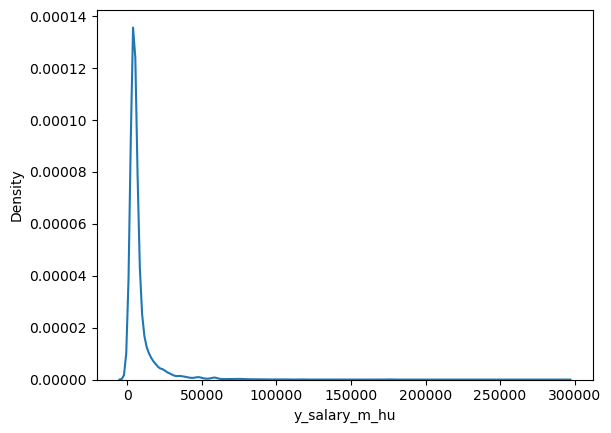

In [34]:
# Total de la muestra: resumen respecto del ingreso total mensual

print(summarize(df_18, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='y_salary_m_hu')

(8123.17994685356, 12406.06831961661, 1248544.0, 518.518493652344, 291666.65625)
(7808.223939491484, 10903.688176894684, 1211179.0, 151.909729003906, 175000.0)


<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

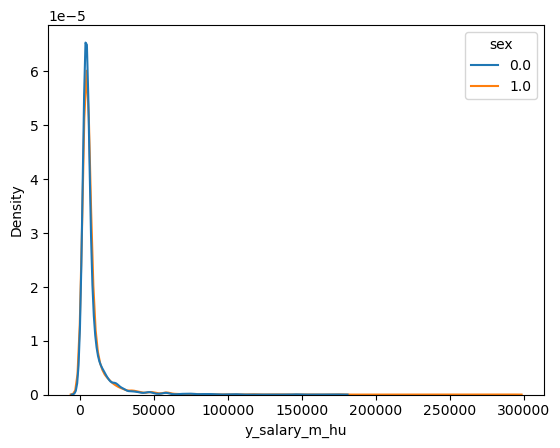

In [35]:
# Distinción por género

df_18_v = df_18[df_18['sex']==1.0]

df_18_m = df_18[df_18['sex']==0.0]


print(summarize(df_18_v, 'y_salary_m_hu', 'fweight'))
print(summarize(df_18_m, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="sex")

(9123.226794583554, 12799.651194207443, 1886900.0, 151.909729003906, 291666.65625)
(4163.044793372439, 5327.541591858908, 572823.0, 326.666656494141, 136111.109375)


<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

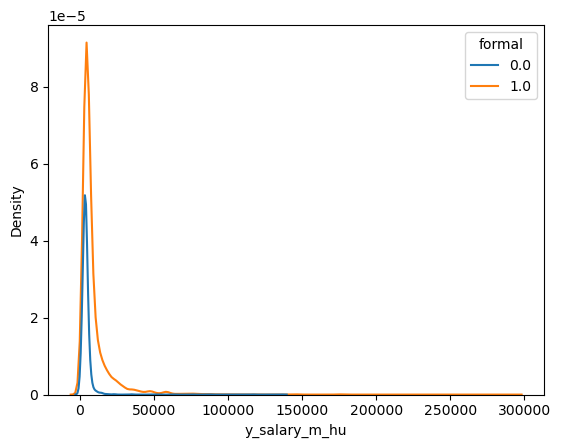

In [36]:
# Distinción por formalidad

df_18_f = df_18[df_18['formal']==1.0]

df_18_i = df_18[df_18['formal']==0.0]


print(summarize(df_18_f, 'y_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="formal")

<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

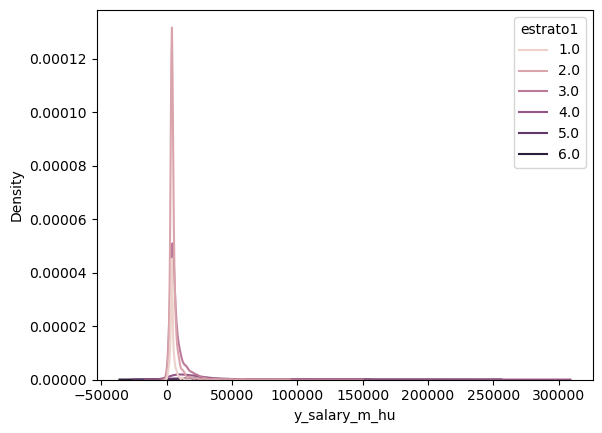

In [37]:
# Completamos los restantes gráficos para estrato y nivel educ

sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="estrato1")



<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

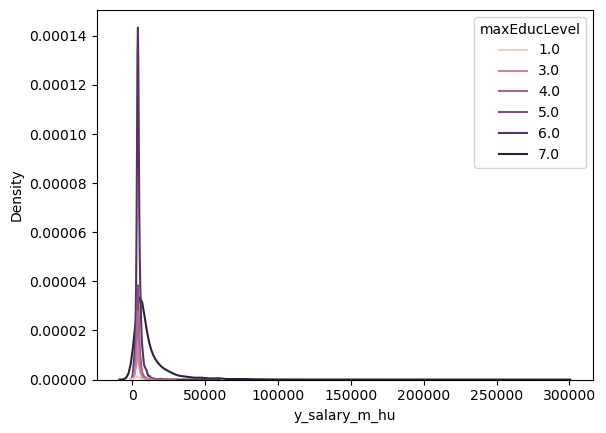

In [38]:
sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="maxEducLevel")

#### Disclaimer - data cleaning

Dado que la distribución de ingresos laborales presenta una asimetría negativa, es decir, que los valores altos de salarios elevan la media, procedemos a generar una transformación de esta variable aplicando logaritmo natural. Además, se incorpora como variable si el individuo percibió algún tipo de subsidio. 

In [39]:
# Aplicación de logaritmo natural

df_18['ly_salary_m_hu'] = np.log(df_18['y_salary_m_hu'])


# Función pora verificar si percibió un subsidio.

def subsidio(x):
    if x['p6585s1'] == 1:
        return 1
    elif x['p6585s2'] == 1:
        return 1
    elif x['p6585s3'] == 1:
        return 1
    elif x['p6585s4'] == 1:
        return 1
    else:
        return 0
    
    
df_18['subsidio'] = df_18.apply(subsidio, axis=1)

df_18

,directorio,secuencia_p,orden,formal,estrato1,sex,age,fweight,maxEducLevel,y_salary_m_hu,y_total_m,p6585s1,p6585s2,p6585s3,p6585s4,ly_salary_m_hu,subsidio
2,4514331,1,1,1.00,2.00,1.00,36.00,255.00,6.00,6740.74,1620833.25,1,0,1,0,8.82,1
9,4514333,1,1,1.00,2.00,1.00,51.00,194.00,7.00,5833.33,1378973.375,0,1,0,0,8.67,1
14,4514334,1,1,1.00,2.00,1.00,45.00,243.00,4.00,3073.82,883357,0,1,0,0,8.03,1
16,4514335,1,1,0.00,2.00,1.00,61.00,230.00,3.00,4083.33,7e+05,0,0,0,0,8.31,0
22,4514338,1,2,1.00,2.00,0.00,35.00,342.00,7.00,8263.89,1941500.125,0,0,1,0,9.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32174,4804453,1,6,1.00,3.00,1.00,24.00,233.00,7.00,5045.83,1088000,0,1,0,0,8.53,1
32176,4804453,1,8,1.00,3.00,0.00,50.00,233.00,6.00,4310.30,1146544.375,0,1,0,0,8.37,1
32181,4804454,1,1,1.00,2.00,1.00,27.00,387.00,6.00,3797.70,916119.6875,0,1,1,0,8.24,1
32182,4804454,1,2,1.00,2.00,0.00,24.00,387.00,6.00,3000.00,1003666.6875,0,0,1,0,8.01,1


#### Disclaimer - análisis descriptivo

Dada la nueva variable logarítmica, realizamos el mismo análisis descriptivo que antes.

(8.617460355169982, 0.724308440157667, 2459723.0, 5.023286456292669, 12.583366840957355)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

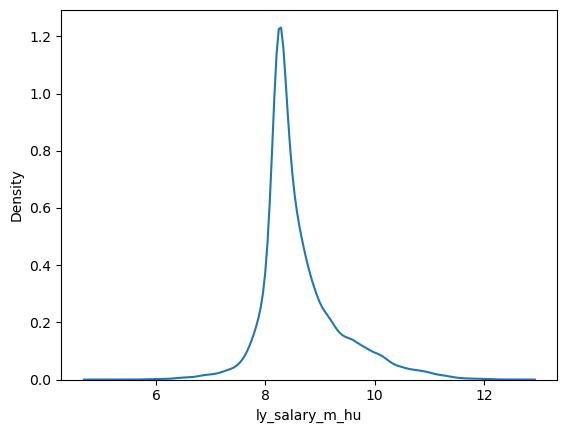

In [40]:
# Total de la muestra: resumen respecto del ingreso total mensual

print(summarize(df_18, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu')

(8.639597629700253, 0.7063905901328529, 1248544.0, 6.250975694636872, 12.583366840957355)
(8.594640143383675, 0.7417080039288317, 1211179.0, 5.023286456292669, 12.072541252905651)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

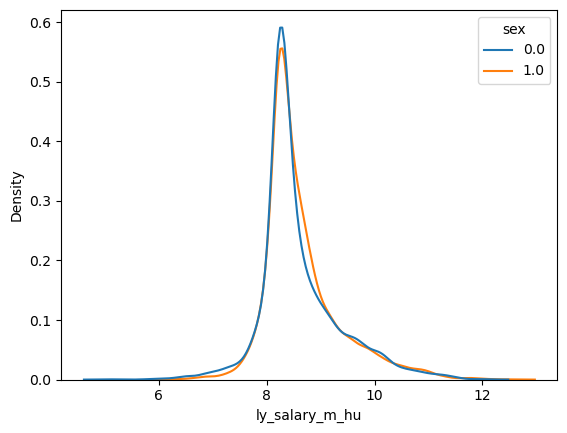

In [41]:
# Distinción por género

df_18_v = df_18[df_18['sex']==1.0]

df_18_m = df_18[df_18['sex']==0.0]


print(summarize(df_18_v, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_m, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="sex")

(8.757893014206996, 0.7149189315500121, 1886900.0, 5.023286456292669, 12.583366840957355)
(8.154870018649024, 0.5387997531062098, 572823.0, 5.788940251856123, 11.821226811869643)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

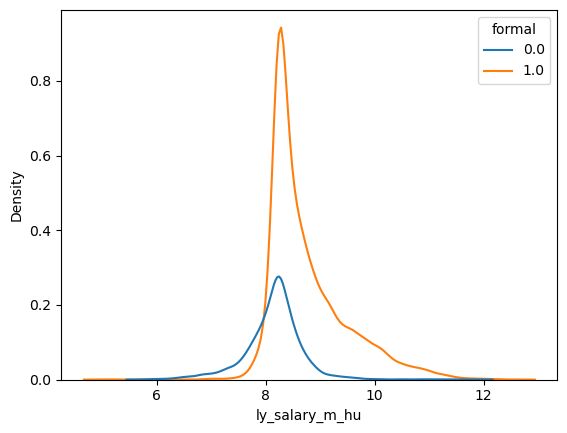

In [42]:
# Distinción por formalidad

df_18_f = df_18[df_18['formal']==1.0]

df_18_i = df_18[df_18['formal']==0.0]


print(summarize(df_18_f, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="formal")

(8.50282797563376, 0.45430357513433944, 1453498.0, 5.023286456292669, 12.29568480421986)
(8.783047509525252, 0.9685350541479776, 1006225.0, 5.788940251856123, 12.583366840957355)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

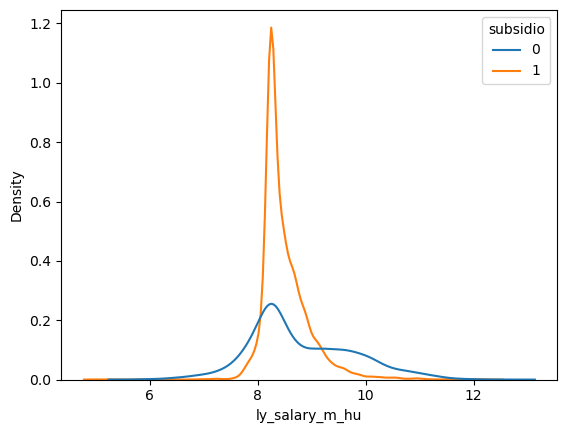

In [43]:
# Distinción por recepción de subsidio

df_18_f = df_18[df_18['subsidio']==1]

df_18_i = df_18[df_18['subsidio']==0]


print(summarize(df_18_f, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="subsidio")

<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

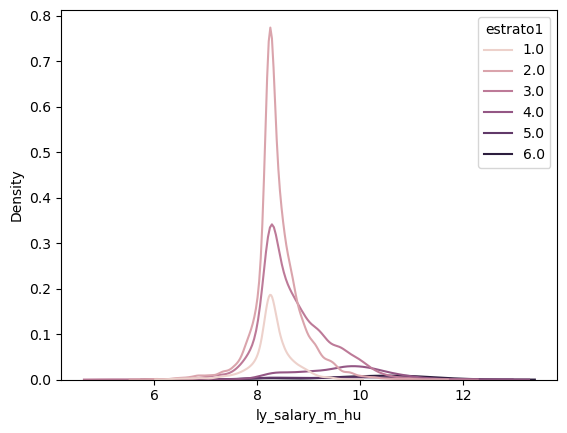

In [44]:
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="estrato1")

<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

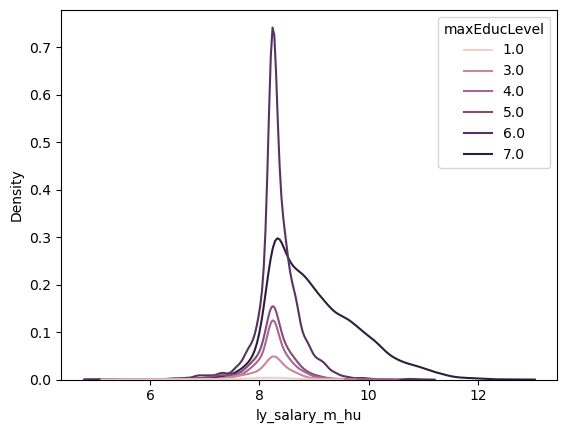

In [45]:
sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="maxEducLevel")

### Etapa 4: Análisis predictivo

In [46]:
# Variables independientes para la predicción
X = df_18[['age', 'sex', 'formal', 'estrato1', 'maxEducLevel', 'subsidio']]  

# Variable dependiente
y = df_18[['y_salary_m_hu']]

# Dividimos los conjuntos X e Y en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

# Modelo de regresión
# Creamos una lista para almacenar las variables acumuladas
variables_acumuladas = []
resultados = []

# Iteramos sobre las columnas de X_train
for x in X_train.columns.values.tolist():
    # Agregamos la nueva variable al conjunto acumulado
    variables_acumuladas.append(x)
    
    # Filtramos las columnas acumuladas en X_train
    X_acumulado = X_train[variables_acumuladas]
    
    # Corremos el modelo de regresión
    reg = LinearRegression().fit(X_acumulado, y_train)
    
    # Realizamos un predict con el conjunto de entrenamiento
    y_train_pred = reg.predict(X_acumulado)
    
    # Realizamos una predicción con el conjunto de testing
    y_hat_model = reg.predict(X_test[variables_acumuladas])
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_acumulado, y_train),
        'Y predicha': y_hat_model,
        "RMSE_training": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_testing": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

    
    
# Modelos polinómicos

for i in range(2,7):
    # Realizamos una transformación polinómica y corremos la regresión
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    reg =  LinearRegression().fit(X_train_poly,y_train)
    
    # Realizamos un predict con el conjunto de entrenamiento
    y_train_pred = reg.predict(X_train_poly)
    
    # Realizamos una transformación polinómica y luego la predicción con el conjunto de testing
    X_test_poly = poly.fit_transform(X_test[variables_acumuladas])
    y_hat_model = reg.predict(X_test_poly)
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_train_poly, y_train),
        'Y predicha': y_hat_model,
        "RMSE_training": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE_testing": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })


# Mostramos los resultados de cada modelo
for i, modelo in enumerate(resultados, 1):
    print(f"Modelo {i}:")
    print(f"  Variables: {modelo['variables']}")
    print(f"  Coeficientes: {modelo['coeficientes']}")
    print(f"  Intercepto: {modelo['intercepto']}")
    print(f"  R²: {modelo['score']:.4f}")
    print("-" * 10)
    print(f"  RMSE (train): {modelo['RMSE_training']:.2f}")
    print(f"  RMSE (test): {modelo['RMSE_testing']:.2f}")
    print(f"  Error: {modelo['Error']:.2f}")
    print("-" * 40)

Modelo 1:
  Variables: ['age']
  Coeficientes: [[150.05520539799022]]
  Intercepto: [2633.77577536]
  R²: 0.0240
----------
  RMSE (train): 11508.82
  RMSE (test): 11521.53
  Error: 1.50
----------------------------------------
Modelo 2:
  Variables: ['age', 'sex']
  Coeficientes: [[150.57944650971294, 468.81181583661856]]
  Intercepto: [2380.70097475]
  R²: 0.0244
----------
  RMSE (train): 11506.43
  RMSE (test): 11519.97
  Error: 1.50
----------------------------------------
Modelo 3:
  Variables: ['age', 'sex', 'formal']
  Coeficientes: [[144.2860588561083, 314.04556907218534, 5107.427749757564]]
  Intercepto: [-1215.93296838]
  R²: 0.0590
----------
  RMSE (train): 11300.71
  RMSE (test): 11401.09
  Error: 1.48
----------------------------------------
Modelo 4:
  Variables: ['age', 'sex', 'formal', 'estrato1']
  Coeficientes: [[87.04038963820011, 1116.6327563580903, 3356.7710897457287, 5766.089438302945]]
  Intercepto: [-12724.89812392]
  R²: 0.2812
----------
  RMSE (train): 9877

In [47]:
# Indicar número de modelo para x

x = 0
modelo = resultados[x]
modelo

{'variables': ['age'],
 'coeficientes': [[150.05520539799022]],
 'intercepto': array([2633.77577536]),
 'score': 0.024036116674057584,
 'Y predicha': array([[8936.09440207],
        [6985.3767319 ],
        [6985.3767319 ],
        ...,
        [6085.04549951],
        [9686.37042906],
        [6535.2111157 ]]),
 'RMSE_training': 11508.81730333567,
 'RMSE_testing': 11521.532856405503,
 'Error': 1.4985080143468192}

In [48]:
parametros = []
RMSE_train = []
RMSE_test = []

for i in range(0,11):
    for c in resultados[i]['coeficientes']:
        coeficientes = len(c)
        parametros.append(coeficientes)
    RMSE_train.append(resultados[i]['RMSE_training'])
    RMSE_test.append(resultados[i]['RMSE_testing'])

In [23]:
print(parametros)


[1, 2, 3, 4, 5, 6, 28, 84, 210, 462, 924]


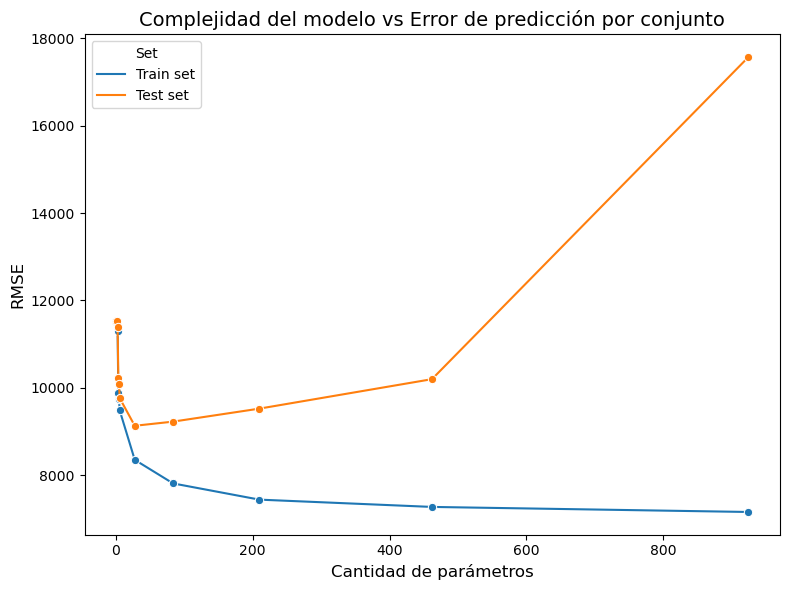

In [49]:
graph = pd.DataFrame({
    'parametros': parametros,
    'Train set': RMSE_train,
    'Test set': RMSE_test
})

# Convertir a formato largo
graph_long = pd.melt(graph, id_vars=['parametros'], 
                  value_vars=['Train set', 'Test set'],
                  var_name='Set', value_name='RMSE')

plt.figure(figsize=(8, 6))
sns.lineplot(data=graph_long, x='parametros', y='RMSE', hue='Set', marker='o')

# Personalización
plt.title('Complejidad del modelo vs Error de predicción por conjunto', fontsize=14)
plt.xlabel('Cantidad de parámetros', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend(title='Set')
plt.tight_layout()
plt.show()

In [25]:
graph

,parametros,Train set,Test set
0,1,2379.77,1902.14
1,2,2362.19,1878.39
2,3,2328.08,1826.76
3,4,2318.03,1813.13
4,5,2306.06,1801.95
5,6,2295.00,1778.73
6,28,2236.47,1732.10
7,84,2162.67,1809.39
8,210,2111.38,2054.78
9,462,2064.17,2197.76


### Anexo

In [26]:
df_18.columns.values.tolist()

['directorio',
 'secuencia_p',
 'orden',
 'formal',
 'estrato1',
 'sex',
 'age',
 'fweight',
 'maxEducLevel',
 'y_salary_m_hu',
 'y_total_m',
 'p6585s1',
 'p6585s2',
 'p6585s3',
 'p6585s4',
 'ly_salary_m_hu',
 'subsidio']

In [27]:
df_18['maxEducLevel'].unique()

array([6., 4., 3., 5., 1., 0.])

In [28]:
df_18.columns.values

array(['directorio', 'secuencia_p', 'orden', 'formal', 'estrato1', 'sex',
       'age', 'fweight', 'maxEducLevel', 'y_salary_m_hu', 'y_total_m',
       'p6585s1', 'p6585s2', 'p6585s3', 'p6585s4', 'ly_salary_m_hu',
       'subsidio'], dtype=object)

In [29]:
# Variables independientes para la predicción
X = df_18[['age', 'sex', 'formal', 'estrato1', 'maxEducLevel', 'subsidio']]  

# Variable dependiente
y = df_18[['ly_salary_m_hu']]

# Dividimos los conjuntos X e Y en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

# Modelo de regresión
# Creamos una lista para almacenar las variables acumuladas
variables_acumuladas = []
resultados = []

# Iteramos sobre las columnas de X_train
for x in X_train.columns.values.tolist():
    # Agregamos la nueva variable al conjunto acumulado
    variables_acumuladas.append(x)
    
    # Filtramos las columnas acumuladas en X_train
    X_acumulado = X_train[variables_acumuladas]
    
    # Corremos el modelo de regresión
    reg = LinearRegression().fit(X_acumulado, y_train)
    
    # Realizamos una predicción con el conjunto de testing
    y_hat_model = reg.predict(X_test[variables_acumuladas])
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_acumulado, y_train),
        'Y predicha': y_hat_model,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

    
    
# Modelos polinómicos

for i in range(2,8):
    # Realizamos una transformación polinómica y corremos la regresión
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    reg =  LinearRegression().fit(X_train_poly,y_train)
    
    # Realizamos una transformación polinómica y luego la predicción con el conjunto de testing
    X_test_poly = poly.fit_transform(X_test[variables_acumuladas])
    y_hat_model = reg.predict(X_test_poly)
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_train_poly, y_train),
        'Y predicha': y_hat_model,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })


# Mostramos los resultados de cada modelo
for i, modelo in enumerate(resultados, 1):
    print(f"Modelo {i}:")
    print(f"  Variables: {modelo['variables']}")
    print(f"  Coeficientes: {modelo['coeficientes']}")
    print(f"  Intercepto: {modelo['intercepto']}")
    print(f"  R²: {modelo['score']:.4f}")
    print("-" * 10)
    print(f"  RMSE: {modelo['RMSE']:.2f}")
    print(f"  Error: {modelo['Error']:.2f}")
    print("-" * 40)

Modelo 1:
  Variables: ['age']
  Coeficientes: [[0.0015669578816724192]]
  Intercepto: [8.23595327]
  R²: 0.0024
----------
  RMSE: 0.41
  Error: 0.05
----------------------------------------
Modelo 2:
  Variables: ['age', 'sex']
  Coeficientes: [[0.0020418145582600947, 0.1285100103293656]]
  Intercepto: [8.14724517]
  R²: 0.0270
----------
  RMSE: 0.40
  Error: 0.05
----------------------------------------
Modelo 3:
  Variables: ['age', 'sex', 'formal']
  Coeficientes: [[0.0017502901590183174, 0.10404664850722095, 0.2480491634811771]]
  Intercepto: [8.00454142]
  R²: 0.1082
----------
  RMSE: 0.38
  Error: 0.05
----------------------------------------
Modelo 4:
  Variables: ['age', 'sex', 'formal', 'estrato1']
  Coeficientes: [[0.0014618759847948178, 0.10933823381862963, 0.24740452191667908, 0.03635025922258633]]
  Intercepto: [7.93358456]
  R²: 0.1128
----------
  RMSE: 0.38
  Error: 0.05
----------------------------------------
Modelo 5:
  Variables: ['age', 'sex', 'formal', 'estrat